# Modeling Golzapour's synthetic oil

In [1]:
c = """METHANE
PROPANE
n-PENTANE
n-DECANE
n-HEXADECANE"""

In [2]:
f = """0.8232
0.0871
0.0505
0.0198
0.0194
"""

In [3]:
from sur import Mixture, EosSetup, setup_database
setup_database()

In [4]:
m = Mixture()

In [5]:
m.add_many(c, f)

In [6]:
m.sort()
m

[(<Compound: METHANE>, Decimal('0.8232')), (<Compound: PROPANE>, Decimal('0.0871')), (<Compound: n-PENTANE>, Decimal('0.0505')), (<Compound: n-DECANE>, Decimal('0.0198')), (<Compound: n-HEXADECANE>, Decimal('0.0194'))]

In [7]:
from itertools import combinations

In [8]:
setup = EosSetup.objects.create(eos='RKPR', kij_mode=EosSetup.T_DEP, lij_mode=EosSetup.CONSTANTS)

In [9]:
for c1, c2 in combinations(m.compounds, 2):
    t = c1.tc if c1.weight < c2.weight else c2.tc
    setup.set_interaction('tstar', c1, c2, t)

In [10]:
setup.tstar(m)

array([[   0.   ,  190.564,  190.564,  190.564,  190.564],
       [ 190.564,    0.   ,  369.83 ,  369.83 ,  369.83 ],
       [ 190.564,  369.83 ,    0.   ,  469.7  ,  469.7  ],
       [ 190.564,  369.83 ,  469.7  ,    0.   ,  617.7  ],
       [ 190.564,  369.83 ,  469.7  ,  617.7  ,    0.   ]])

In [11]:
setup.set_interaction('k0', 'methane', 'propane', 0.0572)
setup.set_interaction('k0', 'methane', 'n-pentane', 0.05616)
setup.set_interaction('k0', 'methane', 'n-decane', 0.06891)
setup.set_interaction('k0', 'methane', 'n-hexadecane', 0.14031);

In [12]:
setup.k0(m)

array([[ 0.     ,  0.0572 ,  0.05616,  0.06891,  0.14031],
       [ 0.0572 ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.05616,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.06891,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.14031,  0.     ,  0.     ,  0.     ,  0.     ]])

In [13]:
setup.set_interaction('lij', 'methane', 'propane', -0.00272)
setup.set_interaction('lij', 'methane', 'n-pentane', -0.06603)
setup.set_interaction('lij', 'methane', 'n-decane', -0.09227)
setup.set_interaction('lij', 'methane', 'n-hexadecane', -0.12441);

In [14]:
setup.lij(m)

array([[ 0.      , -0.00272 , -0.06603 , -0.09227 , -0.12441 ],
       [-0.00272 ,  0.      , -0.010835, -0.032481, -0.023269],
       [-0.06603 , -0.010835,  0.      , -0.02353 , -0.012501],
       [-0.09227 , -0.032481, -0.02353 ,  0.      ,  0.049878],
       [-0.12441 , -0.023269, -0.012501,  0.049878,  0.      ]])

In [15]:
envelope = m.get_envelope(setup)

In [17]:
%matplotlib inline

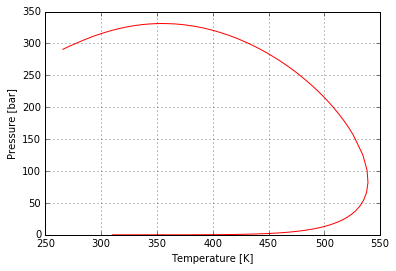

In [19]:
envelope.plot();

## Debug attributes

There is possible to see the raw input and output data that sur interchange with the ``EnvelopeSur.exe`` fortran program.

In [21]:
print(envelope.input_txt)

5		NC
0.8232  0.0871  0.0505  0.0198  0.0194  		z1,z2...zNC
3				NMODEL (1:SRK / 2:PR / 3:RKPR)
0  1			ncomb, nTdep
METHANE(1)
190.564  45.99 0.0115478  0.116530154855 1.16          tc, pc, ohm, vc, zrat
2.30376807604   0.0304337956072   0.5   1.54083758839		ac, b, delta1, k
PROPANE(2)
369.83  42.48 0.152291  0.233012170918 1.16          tc, pc, ohm, vc, zrat
9.80216972295   0.0598748909487   1.663687   1.9574557212		ac, b, delta1, k
0.0572          k0
190.564       tstar
-0.00272 		lij
n-PENTANE(3)
469.7  33.7 0.251506  0.366506659349 1.16          tc, pc, ohm, vc, zrat
20.2236971345   0.0936309815449   1.957315   2.28798764446		ac, b, delta1, k
0.05616   0.0          k0
190.564   369.83       tstar
-0.06603   -0.010835 		lij
n-DECANE(4)
617.7  21.1 0.492328  0.756468369911 1.16          tc, pc, ohm, vc, zrat
56.6610724692   0.192140038284   2.239538   3.11337933794		ac, b, delta1, k
0.06891   0.0   0.0          k0
190.564   369.83   469.7       tstar
-0.09227   -0.032481   -0.02353 	

In [22]:
print(envelope.output_txt)

METHANE(1)        
Tc= 190.5640   Pc =  45.9900   Vc =  0.1005   OM = 0.0115
Zc=   0.2916 Zcrat=   1.1600 Zceos=  0.3382 Vceos= 0.1165
ac=   2.3038    b =   0.0304  del1=  0.5000    k = 1.5408
PROPANE(2)        
Tc= 369.8300   Pc =  42.4800   Vc =  0.2009   OM = 0.1523
Zc=   0.2775 Zcrat=   1.1600 Zceos=  0.3219 Vceos= 0.2330
ac=   9.8022    b =   0.0599  del1=  1.6637    k = 1.9575
n-PENTANE(3)      
Tc= 469.7000   Pc =  33.7000   Vc =  0.3160   OM = 0.2515
Zc=   0.2726 Zcrat=   1.1600 Zceos=  0.3163 Vceos= 0.3665
ac=  20.2237    b =   0.0936  del1=  1.9573    k = 2.2880
n-DECANE(4)       
Tc= 617.7000   Pc =  21.1000   Vc =  0.6521   OM = 0.4923
Zc=   0.2679 Zcrat=   1.1600 Zceos=  0.3108 Vceos= 0.7565
ac=  56.6611    b =   0.1921  del1=  2.2395    k = 3.1134
n-HEXADECANE(5)   
Tc= 723.0000   Pc =  14.0000   Vc =  1.1573   OM = 0.7174
Zc=   0.2695 Zcrat=   1.1600 Zceos=  0.3127 Vceos= 1.3425
ac= 116.4264    b =   0.3417  del1=  2.1429    k = 3.9035
 
 Tc, Pc and Vc are given in K, ba